1. loading all the libraries.
2. reading the dataset
3. select the feature (independent)and the target (dependent)
4. split the dataset into train and test
5. create the model and fit it with training
6. predict the target for test data
7. evaluate the model
8. visualize the model
9. save the model
10. load the model 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
automobile_data_url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/automobile.csv'
df = pd.read_csv(automobile_data_url)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
numerical_col = ['normalized-losses','wheel-base', 'length', 'width', 'height','curb-weight','engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

categorical_col = ['symboling', 'make', 'fuel-type','aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [6]:
# preprocessing in this dataset is required
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

numerical_col = ['normalized-losses','wheel-base','length','width','height',
'curb-weight','engine-size','bore','stroke','compression-ratio','horsepower',
'peak-rpm','city-mpg','highway-mpg','price']

categorical_col = ['symboling','make','fuel-type','aspiration','num-of-doors','body-style',
'drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

# remove all ? from dataframe
df.replace('?', np.nan, inplace=True)

# numerical column with missing values
df[numerical_col].isnull().sum()

df[categorical_col].isnull().sum()

num_col_with_na = ['normalized-losses','bore','stroke','horsepower','peak-rpm']
cat_col_with_na = ['num-of-doors']

num_imp = SimpleImputer()
cat_imp = SimpleImputer(strategy='most_frequent')

df[num_col_with_na] = num_imp.fit_transform(df[num_col_with_na])
df[cat_col_with_na] = cat_imp.fit_transform(df[cat_col_with_na])

binary_cols = ['fuel-type','aspiration','num-of-doors','engine-location']
ordinal_enc = OrdinalEncoder()


df[binary_cols]= ordinal_enc.fit_transform(df[binary_cols])
df.dropna(subset=['price'], inplace= True)
df['price'] = df['price'].astype('float' ) # fixingg the type of price column

# save it as csv
df.to_csv('clean_automobile.csv', index=None)

In [7]:
# lets create a simple linear regression model on horsepower vs Price
dataset = df[['horsepower', 'price']].copy()
dataset.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


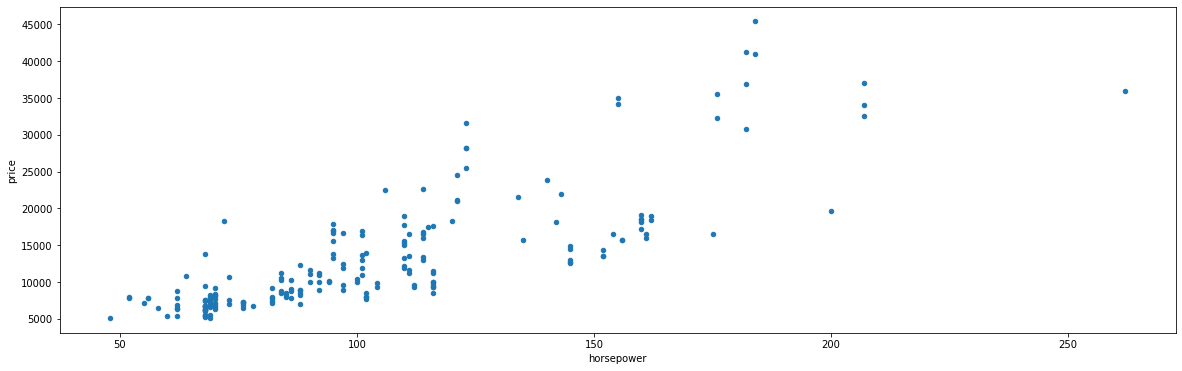

In [8]:
dataset.plot(kind='scatter', x= 'horsepower', y = 'price', figsize = (20, 6))
plt.show()

In [9]:
X = dataset[['horsepower']]  # taken as a 2d matric - features (independent variable)
y = dataset['price'] # taken as a 1d matric - target (dependent variable) 

In [10]:
# split the data into train and test in a ratio of of 80
# test_size = 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [11]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
print('intercept', reg.intercept_)
print('coef', reg.coef_)

intercept -4118.879446320821
coef [165.57449341]


In [13]:
# Y_pred = predict the value, X_test = it have different value of horsepower
y_pred = reg.predict(X_test)           

In [14]:
r2_score(y_test, y_pred)  # r2 score : higher the better

0.7827421900758174

In [15]:
mse = mean_squared_error(y_test, y_pred)   # mean squared error : lower the better
mae = mean_absolute_error(y_test, y_pred) # mean absolute error : lower the better
# prediction

In [16]:
print('mse', mse)
print('mae', mae)

mse 16461687.666475942
mae 3156.3311728145854


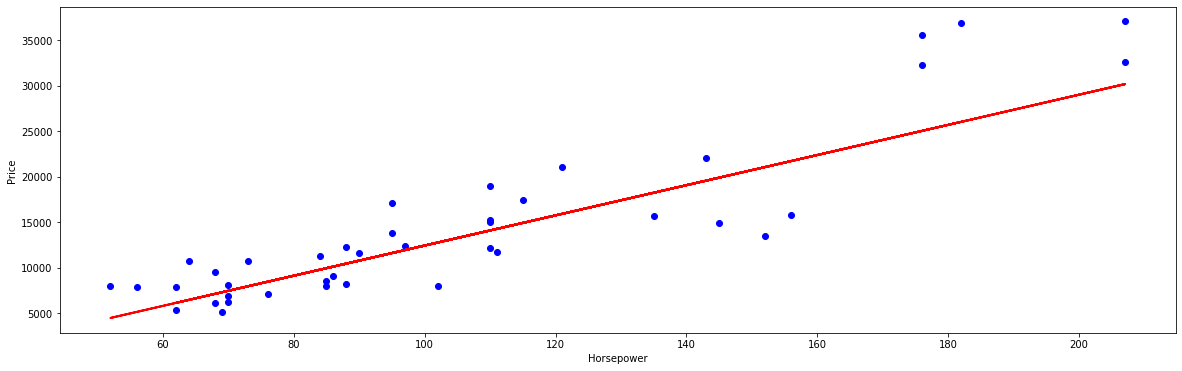

In [17]:

fix, ax = plt.subplots(figsize = (20,6))
ax.scatter(X_test, y_test, color= 'blue')
ax.plot(X_test, y_pred, color= 'red', linewidth= 2)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Price')
plt.show()

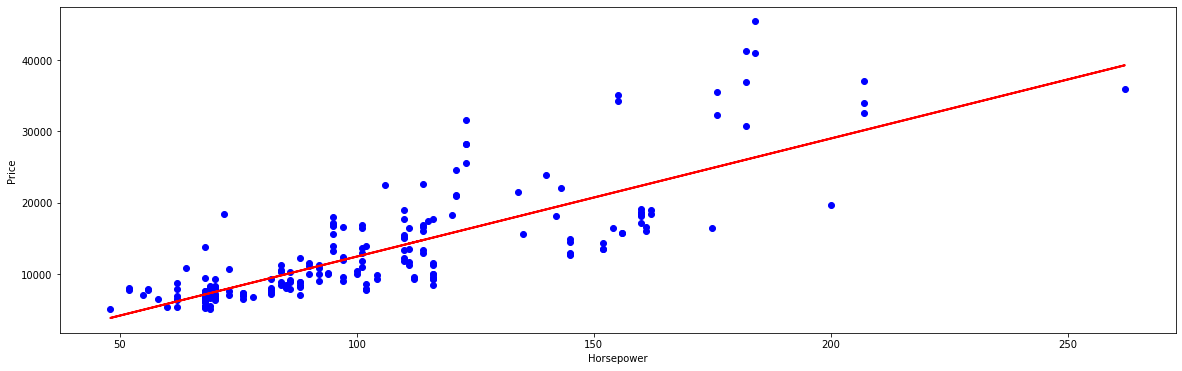

In [18]:
fig, ax = plt.subplots(figsize= (20,6))
ax.scatter(X, y, color= "blue")
ax.plot(X, reg.predict(X), color = 'red', linewidth= 2)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Price')
plt.show()

In [19]:
# predicts the price of horsepower
print_for175 = reg.predict(np.array([[176]]))[0]                 # [0]-means to save single data
print(print_for175)

25022.231394491824


c:\Users\uqba2\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
horse_power_list = [[100], [50], [150], [200]]
prices = reg.predict(np.array(horse_power_list))
print(prices)

[12438.56989505  4159.84522436 20717.29456574 28996.01923642]


c:\Users\uqba2\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
# for saving model
from joblib import dump, load

In [22]:
dump(reg, 'price_by_hp.joblib')

['price_by_hp.joblib']

In [23]:
loaded_model = load('price_by_hp.joblib')
print(loaded_model.predict(np.array([[175]])))

[24856.65690108]


c:\Users\uqba2\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
